## 常用分布

### np.random.normal(0,1,1000) / np.random.normal(mu, sigma, 1000)
### np.random.randint(1, 7) # 1-6 as dice roll
### np.random.choice(values, p=probs) / np.random.choice([1, 2, 3, 4, 5, 6])
### np.random.binomial(1,p) 
### np.random.uniform(0,1,10)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

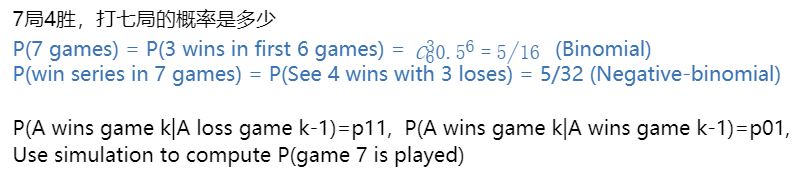

In [2]:
p=0.5
p_01=0.6
p_11=0.4

def who_wins(p):
    u=np.random.rand()
    return u>p
    

def game():
    n=0
    A_win=0
    B_win=0
    A_last_game=None
    
    while True:        
        if A_last_game is None:
            A_last_game = who_wins(p)
        elif A_last_game==1:
            A_last_game = who_wins(p_01)
        else:
            A_last_game = who_wins(p_11)
        
        n=n+1
        A_win+=A_last_game
        B_win+=1-A_last_game
        
        if A_win==4 or B_win==4:
            return n

In [3]:
sum([game()//7 for i in range(1000)])/1000

0.36

## 模拟 dice

In [4]:
values = [1, 2, 3, 4, 5, 6]
probs = [0.1, 0.2, 0.2, 0.2, 0.2, 0.1]
sample = np.random.choice(values, p=probs)

In [5]:
dice_roll = np.random.randint(1, 7)
dice_roll

6

## 模拟硬币
* https://cmdlinetips.com/2018/12/simulating-coin-toss-experiment-with-binomial-random-numbers-using-numpy/

In [6]:
def coin_flip(p=0.5):    
    #perform the binomial distribution (returns 0 or 1)    
    result = np.random.binomial(1,p) 
       
    #return flip to be added to numpy array    
    return result

coin_flip()

1

In [7]:
n = 1
p = 0.5
np.random.binomial(n,p)

0

## 用biased coin生成uniform discrete number

### (1) 先用 biased coin 弄到 fair coin, 想大于 rand_2()
### (2) 再用 rand_2 to rand_n

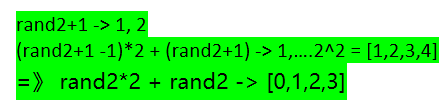

In [8]:
import math

def flip(p=0.7):
    if np.random.rand()<=p:
        return 1
    else:
        return 0
    
def rand2():
    while True:
        a=flip()
        b=flip()
        
        if a^b:
            return a # [0, 1]
        # rand2() + 1 -> [1, 2]

def du(n):
    M = int(np.log2(n)) + 1
    print(M)
    
    while True:
        r=0
        for i in range(M):
            r+=rand2()*(2**i) # 一直往上 
            
            # 0
            # + rand2()*(2**0) -> [0, 1]
            # + rand2()*(2**1) -> [0, 2] -> [0, 1, 2, 3]
            # + rand2()*(2**2) -> [0, 4] -> [1, 2, 3, 4, 5, 6, 7]
        
        if r<=n:
            return r

In [9]:
du(10)

4


2

## normal dist to uniform discrete (1, 100)

* 知道normal的cdf其实就是uniform dist，所以直接对生成的normal dist number求densityfunction value就是unif，然后如果这个value在0-0.01就是1，0.02-0.03就是2以此类推生成random integer with equal prob

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [33]:
from scipy.stats import norm

In [34]:
norm(0, 1)

(array([0.00133662, 0.00066831, 0.00066831, 0.00200493, 0.00334155,
        0.00534647, 0.00868802, 0.01603942, 0.00801971, 0.01603942,
        0.02740068, 0.04143518, 0.06883586, 0.08086543, 0.08821684,
        0.13032033, 0.16908227, 0.19715126, 0.20984914, 0.26531882,
        0.29806598, 0.33950116, 0.36757015, 0.37024339, 0.38828774,
        0.43105954, 0.39430252, 0.38761943, 0.36088706, 0.33214975,
        0.30608569, 0.26999698, 0.23257166, 0.18846324, 0.14702806,
        0.12965202, 0.08420698, 0.08086543, 0.07418234, 0.04678166,
        0.03274716, 0.02806899, 0.01737604, 0.01336619, 0.00868802,
        0.00534647, 0.00200493, 0.00133662, 0.00200493, 0.00200493]),
 array([-3.81600374, -3.66637244, -3.51674114, -3.36710984, -3.21747854,
        -3.06784724, -2.91821593, -2.76858463, -2.61895333, -2.46932203,
        -2.31969073, -2.17005942, -2.02042812, -1.87079682, -1.72116552,
        -1.57153422, -1.42190292, -1.27227161, -1.12264031, -0.97300901,
        -0.82337771, -0.67

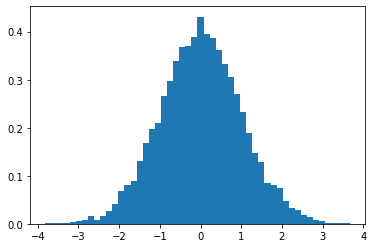

In [35]:
vals = norm.rvs(size=10000)

plt.hist(vals, density=True, bins=50)

(array([0.00963636, 0.01020202, 0.00987879, 0.00953535, 0.01024242,
        0.01030303, 0.01022222, 0.00987879, 0.00973737, 0.01034343,
        0.0109899 , 0.01030303, 0.0100202 , 0.01026263, 0.0099798 ,
        0.01020202, 0.01026263, 0.01016162, 0.00909091, 0.01076768]),
 array([ 0.  ,  4.95,  9.9 , 14.85, 19.8 , 24.75, 29.7 , 34.65, 39.6 ,
        44.55, 49.5 , 54.45, 59.4 , 64.35, 69.3 , 74.25, 79.2 , 84.15,
        89.1 , 94.05, 99.  ]),
 <BarContainer object of 20 artists>)

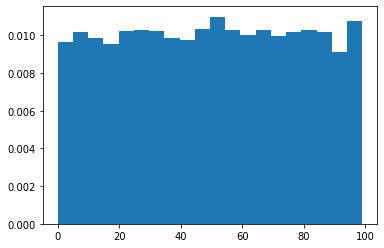

In [39]:
vals_cdf = norm.cdf(vals)

arr = []
for val in vals_cdf:
    x = int(val/0.01)
    arr.append(x)
    
plt.hist(arr, density=True, bins=20)